Выделение смысловых единиц.

Что уже есть:

1. Выделение текстовых объектов из слайдов
2. Подсчет частоты использования слов
3. Выделение частей речи для каждого слова
4. Построение n-грамов

To-do list:

1. Встречаемость слов в презентации *
2. Схлопывание очищенных текстовых блоков в единые сущности - на основе очищенного текста сделанть нграмы, потом в ориг тексте схлопнуть. Метрики для предложений в ориг тексте на основе выделения сырой формы. Потом обратно можно выбирать из ориг текста сырую версию.  
3. Создание отчета с интерпретацией результатов относительно "Информационного Горлышка" (MVP)
    3.1 сопоставление результатов с теорией и данными о человечкой памяти, обучении и внимании
4. План - дальнейшие возможности и направления развития
    4.1 Сравнить подсчитанные единицы с единицами, найденными Наташей
    4.2 Считать картинки, выделять шрифты и размер, считывать расположение объектов на слайдах, тональность**

/* 'берём блоки - чистим от знаков препинания и службеных частей речи - перобразуем в начальную форму - сплитим весь текст на отдельные слова - высчитываем их частоту встречаемости'

** мне кажется тональность тут тоже может быть полезна на стадии реального применения, тк скорее всего эмоциональные слова по-другому запоминаются и обрабатываются

In [1]:
import re
import numpy as np
import pandas as pd

In [2]:
# Загружаем таблицу, которую сделала Наташа

NVtable = pd.read_csv('infounits_NV.csv')

In [3]:
# Считаем количество смысловых единиц

# count info units
units_count = pd.DataFrame(np.sum(NVtable.notna())).T

units_count.columns = NVtable.columns

units_count

,Защита банковских карт,Биометрия,ИИС,Зарплатный проект,Сбермобайл / 109 (не всё написано),Своё дело,Окко
0,48,31,211,21,59,31,20


In [4]:
from pptx import Presentation

# Great library for working with presentations. Can extract all sorts of objects. 

# https://python-pptx.readthedocs.io/en/latest/index.html

'''
Данная функция достает из презентаций объекты, и вовращает их в следующем формате:
full_text - очищенный текст, сшитый в один string [текст]
slide_list - список слайдов, и текстовые объекты в каждом слайде [слайд][текстовый объект]
slide_headings - список заголовков, по одному на каждый слайд [заголовок]
paragraph_list - список параграфов. параграфы получаются если разделить текст по /n. [параграф]
word_list - список слов в презентации
'''

def presentation_extract(file_path):
    
    prs = Presentation(file_path)
    
    slide_list = []

    # На данный момент ошибается в слайдах, где есть одиночный объект - номер слайда в правом углу
    # Считает это за заголовок. В pptx.Presentation есть функция выделения заголвоков, надо ее попробовать.
    slide_headings = []

    for slide in prs.slides:
        
            text = []
        
            for i,shape in enumerate(slide.shapes):
            
                if hasattr(shape, "text"):
                
                    text.append(shape.text)
        
            slide_list.append(text)
        
            slide_headings.append(text[0])
            
    paragraph_list = []

    for slide in slide_list:
    
        for txt in slide:
           
            paragraph = re.split(r'\n',txt)
        
            paragraph_list.append(paragraph)
            
            word_list = []

    full_text = []

    for slide in slide_list:
    
        for txt in slide:
        
            full_text.append(txt)

    full_text = ' '.join(full_text)
    full_text = full_text.replace('\n', ' ') 
    full_text = full_text.replace('\t', ' ') 
    full_text = full_text.replace('\xa0', ' ') 


    word_list = re.split(r' ',full_text)

    # почему-то убирает не все, остаются пробелы в списке
    [word_list.remove(word) for word in word_list if word == '']
    
    return full_text,slide_list,slide_headings,paragraph_list,word_list

In [5]:
# Сравним 2 презентации по Окко

full_text,slide_list,slide_headings,paragraph_list,word_list = presentation_extract('presentations/Okko_new.pptx')
full_text2,slide_list2,slide_headings2,paragraph_list2,word_list2 = presentation_extract('presentations/Okko_Neurolab.pptx')

In [6]:
# generate list of stopwords

symbols = [',','.','!','?','«','»','+','—','–','-',';','(',')',r'/']
numbers = list(range(11))
numbers = [str(num) for num in numbers]


In [7]:
# strip text of stopwords

full_text_strip = full_text

for sym in symbols:
    
    full_text_strip = full_text_strip.replace(sym, '')

for num in numbers:
    
    full_text_strip = full_text_strip.replace(num, '')

In [8]:
# generate word list clear of stopwords

word_list_strip = re.split(r' ',full_text_strip)
[word_list_strip.remove(word) for word in word_list_strip if word == '']


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
# Выделим части речи. Выделяет не для всех слов.

import pymorphy2

morph = pymorphy2.MorphAnalyzer()

word_morph = [morph.parse(word) for word in word_list]

word_pos = [word[0].tag.POS for word in word_morph]

#word_morph[1][0].tag.POS
#word_morph

Таблица частей речи:

<div>
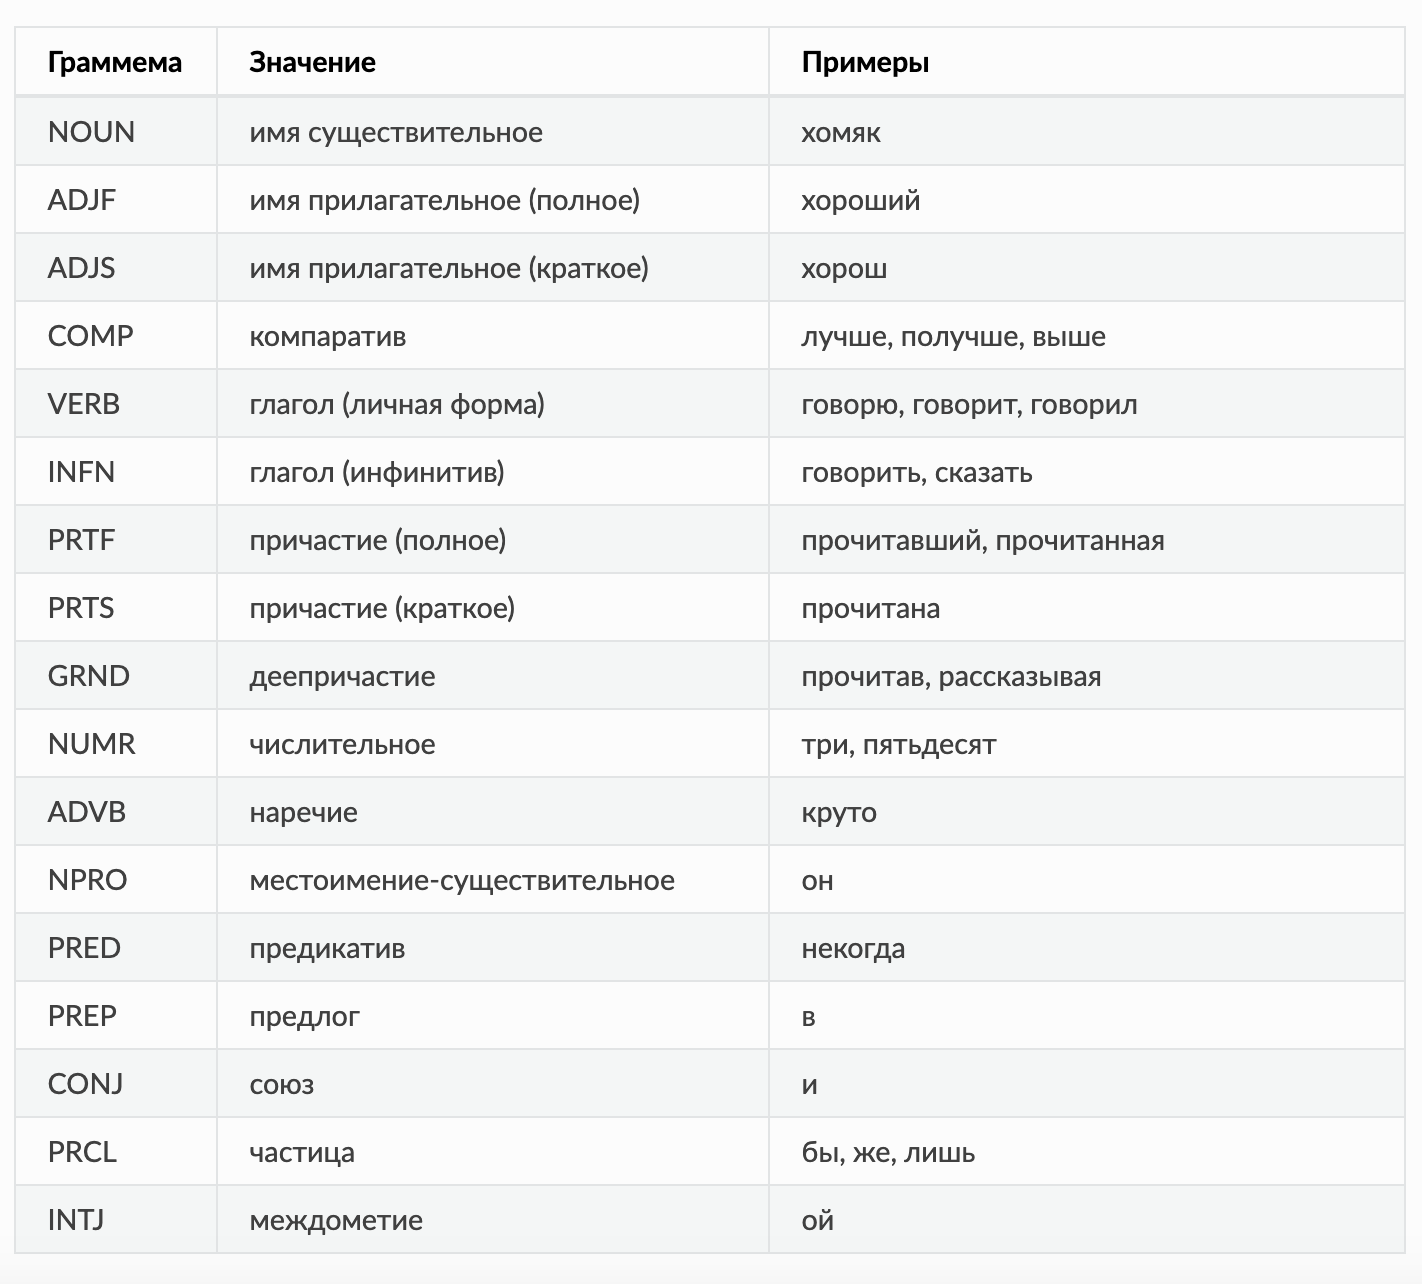
</div>

In [10]:
# Составим список частей речи, от которых мы чистим текст. Например, это могут быть служебные части речи (предлоги и союзы). 

stop_POS = ['PREP','CONJ']

# Морфологический анализ очищенного от спец.символов текста:

word_list_strip_morph = [morph.parse(word) for word in word_list_strip]
word_list_strip_pos = [word[0].tag.POS for word in word_list_strip_morph]

# список служебных слов для удаления

dropwords = []

for i in range(0,len(word_list_strip)):
    
    if word_list_strip_pos[i] in stop_POS:
        
        dropwords.append(word_list_strip[i])

# убираем из списка служебные части речи

word_list_strip_final = [word for word in word_list_strip if word not in dropwords]

# убираем заглавные буквы, чтобы 

word_list_strip_final = [word.lower() for word in word_list_strip_final]


# заменяем слова на их нормальную форму

word_list_strip_inf = [word[0].normal_form for word in word_list_strip_morph if word[0].word in word_list_strip_final]

In [11]:
# секция не работает!! почему-то меняет world_list_strip вместе с world_list_strip_final! 
# то есть remove удаляет значение из двух листов сразу!


# word_list_strip_final = word_list_strip
        
#     for word in dropwords:
      
#         while word in word_list_strip_final:
            
#             word_list_strip_final.remove(word)

In [12]:
# get n-grams

from nltk import ngrams #bigrams
text_bigrams = list(ngrams(word_list,2))
text_trigrams = list(ngrams(word_list,3))

text_bigrams

[('Okko', 'онлайн-кинотеатр'),
 ('онлайн-кинотеатр', 'Что'),
 ('Что', 'такое'),
 ('такое', 'Okko'),
 ('Okko', 'Okko'),
 ('Okko', '–'),
 ('–', 'это'),
 ('это', 'дочернее'),
 ('дочернее', 'общество'),
 ('общество', 'ПАО'),
 ('ПАО', 'Сбербанк'),
 ('Сбербанк', 'Онлайн-кинотеатр'),
 ('Онлайн-кинотеатр', 'Okko'),
 ('Okko', '–'),
 ('–', 'это'),
 ('это', 'возможность'),
 ('возможность', 'смотреть'),
 ('смотреть', 'фильмы'),
 ('фильмы', 'и'),
 ('и', 'сериалы'),
 ('сериалы', 'созданные'),
 ('созданные', 'для'),
 ('для', 'современных'),
 ('современных', 'устройств'),
 ('устройств', '–'),
 ('–', 'телевизоров,'),
 ('телевизоров,', 'мобильных'),
 ('мобильных', 'устройств'),
 ('устройств', 'и'),
 ('и', 'т.д.'),
 ('т.д.', 'Возможность'),
 ('Возможность', 'использовать'),
 ('использовать', 'SMART'),
 ('SMART', 'устройство'),
 ('устройство', 'на'),
 ('на', 'пределе'),
 ('пределе', 'его'),
 ('его', 'возможностей'),
 ('возможностей', '–'),
 ('–', 'получая'),
 ('получая', 'качественные'),
 ('качественные',

<FreqDist with 156 samples and 262 outcomes>


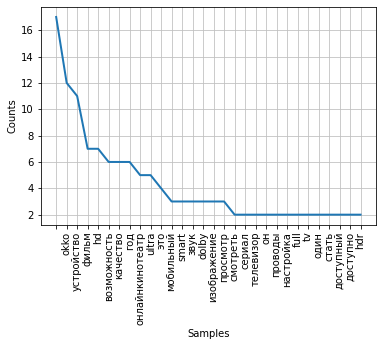

In [13]:
# График частоты использования слов

from nltk.probability import FreqDist
fdist = FreqDist(word_list_strip_inf)
print(fdist)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [14]:
processed_words = pd.DataFrame(word_list_strip_inf)
processed_words.columns = ['words']
word_frequency = pd.DataFrame(processed_words['words'].value_counts())
word_frequency.head(15)

,words
,17
okko,12
устройство,11
фильм,7
hd,7
год,6
качество,6
возможность,6
онлайнкинотеатр,5
ultra,5


In [15]:
import pymorphy2

def text_clean(text):
    
    # осторожно, чтобы не переписывать функцию использую full_text, а эта переменная использовалась ранее
    
    full_text = text
    
    # clean up regex
    
    full_text = full_text.replace('\n', ' ') 
    full_text = full_text = full_text.replace('\t', ' ') 
    full_text = full_text = full_text.replace('\xa0', ' ') 
    
    # generate list of stopwords

    symbols = [',','.','!','?','«','»','+','—','–','-',';','(',')',r'/']
    numbers = list(range(11))
    numbers = [str(num) for num in numbers]
    
    # strip text of stopwords

    full_text_strip = full_text

    for sym in symbols:
    
        full_text_strip = full_text_strip.replace(sym, '')

    for num in numbers:
    
        full_text_strip = full_text_strip.replace(num, '')
        

    
    # generate word list clear of stopwords
    word_list_strip = re.split(r' ',full_text_strip)
    [word_list_strip.remove(word) for word in word_list_strip if word == '']
    
    
    # Выделим части речи. Выделяет не для всех слов.

    morph = pymorphy2.MorphAnalyzer()

    word_morph = [morph.parse(word) for word in word_list]

    word_pos = [word[0].tag.POS for word in word_morph]

    # Составим список частей речи, от которых мы чистим текст. Например, это могут быть служебные части речи (предлоги и союзы). 

    stop_POS = ['PREP','CONJ']

    # Морфологический анализ очищенного от спец.символов текста:

    word_list_strip_morph = [morph.parse(word) for word in word_list_strip]
    word_list_strip_pos = [word[0].tag.POS for word in word_list_strip_morph]

    # список служебных слов для удаления

    dropwords = []

    for i in range(0,len(word_list_strip)):
        
        if word_list_strip_pos[i] in stop_POS:
        
            dropwords.append(word_list_strip[i])

    # убираем из списка служебные части речи

    word_list_strip_final = [word for word in word_list_strip if word not in dropwords]

    # убираем заглавные буквы, чтобы 

    word_list_strip_final = [word.lower() for word in word_list_strip_final]

    # заменяем слова на их нормальную форму

    word_list_strip_inf = [word[0].normal_form for word in word_list_strip_morph if word[0].word in word_list_strip_final] 
    
    return word_list_strip_inf

In [16]:
# I need to write a separate function for extracting headings, 
# which deletes the nonsense, and extracts only good headings

In [17]:
full_text,slide_list,slide_headings,paragraph_list,word_list = presentation_extract('presentations/Okko_new.pptx')

full_text_clean = text_clean(full_text)

# break down slide and text object into cleaned-up chunks
slide_list_clean = []

for slide in slide_list:
    
    paragraphs = []
    
    for para in slide:
        
        paragraph = text_clean(para)
        
        paragraphs.append(paragraph)
    
    slide_list_clean.append(paragraphs)

# break down paragraphs into cleaned-up chunks. note - the para list is [text object][para]
paragraph_list_clean = []

for text_obj in paragraph_list:

    text_objects = []
    
    for para in text_obj:
    
        par_temp = text_clean(para)
    
        text_objects.append(par_temp)
    
    paragraph_list_clean.append(paragraphs)

    

In [18]:
from nltk import ngrams #bigrams
text_bigrams = list(ngrams(full_text_clean,2))

text_bigrams

# ideas - 
# word cloud per presentation, per slide

# word graph - conceptual graph of presentation (how often ngram appears in text?) 
# estimating synaptic weights and correlating with recall
# hypothesis is that not only will frequency affect learning, but that frequency of associated words will affect original 

# total unique information 

# concept density - distance to information 

# agent identification - who is Okko? Who is Sberbank? What is the emotional valence? get emotional valence of connected words

# to-do: grammar analysis (hard!). negation, redundancy, logic

[('okko', 'онлайнкинотеатр'),
 ('онлайнкинотеатр', 'такой'),
 ('такой', 'okko'),
 ('okko', 'okko'),
 ('okko', 'это'),
 ('это', 'дочерний'),
 ('дочерний', 'общество'),
 ('общество', 'пао'),
 ('пао', 'сбербанк'),
 ('сбербанк', 'онлайнкинотеатр'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'это'),
 ('это', 'возможность'),
 ('возможность', 'смотреть'),
 ('смотреть', 'фильм'),
 ('фильм', 'сериал'),
 ('сериал', 'создать'),
 ('создать', 'современный'),
 ('современный', 'устройство'),
 ('устройство', 'телевизор'),
 ('телевизор', 'мобильный'),
 ('мобильный', 'устройство'),
 ('устройство', 'тд'),
 ('тд', 'возможность'),
 ('возможность', 'использовать'),
 ('использовать', 'smart'),
 ('smart', 'устройство'),
 ('устройство', 'предел'),
 ('предел', 'он'),
 ('он', 'возможность'),
 ('возможность', 'получать'),
 ('получать', 'качественный'),
 ('качественный', 'картинка'),
 ('картинка', 'звук'),
 ('звук', 'онлайнкинотеатр'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'удобный'),
 ('удобный', 'быстрый'),
 ('бы

In [19]:
#text_bigrams[0][0] in full_text

#full_text.find(text_bigrams[0][0])

slide_list_sent = []

for slide in slide_list:
    
    sents = []
    
    for text_obj in slide:
        
        sent = text_obj.replace('. ','xcleanx')
        sent = sent.replace('\n','xcleanx')
        
        sent = sent.replace('\t', ' ') 
        sent = sent.replace('\xa0', ' ') 
        
        sent = re.split(r'xcleanx',sent)
                
        sents.append(sent)
    
    slide_list_sent.append(sents)

# break down slide and text object into cleaned-up chunks
slide_list_sent_clean = []

for slide in slide_list_sent:
    
    objects = []
    
    for obj in slide:
        
        sents = []
        
        for sent in obj:
        
            snt = text_clean(sent)
        
            sents.append(snt)
            
        objects.append(sents)
    
    slide_list_sent_clean.append(objects)

In [20]:
slide_list_sent

[[['Okko', 'онлайн-кинотеатр']],
 [['Что такое Okko'],
  ['Okko –  это дочернее общество ПАО Сбербанк',
   'Онлайн-кинотеатр Okko – это возможность смотреть фильмы и сериалы созданные для современных устройств – телевизоров, мобильных устройств и т.д',
   'Возможность использовать SMART устройство на пределе его возможностей – получая качественные картинку и звук.',
   'Онлайн-кинотеатр Okko – удобный и быстрый способ смотреть то, что хочется, без проводов, настроек и поиска фильма в нужном качестве.']],
 [['3'],
  ['почему Okko? – мы задаем вектор развития!'],
  ['2011г',
   '— запуск Full HD (впервые на Smart TV)',
   '2013г',
   '— 3D + первые в РФ предоставили возможность загружать фильмы    в мобильное устройство ',
   '2014г',
   '— стал доступен звук в формате Dolby Digital + первые запустились    на Play Station 3/4 ',
   '2015г',
   '— стало доступно качество изображения Ultra HD',
   '2017г',
   '— доступно качество изображения Ultra HD HDR + звук Dolby Atmos',
   '2019 – Okk

In [21]:
# full_text_clean

# 2 concepts - replay and new information 

abcde = text_clean(slide_list_sent)

AttributeError: 'list' object has no attribute 'replace'

In [ ]:
whatever = slide_list[1][1]

symbols = [',','.','!','?','«','»','+','—','–','-',';','(',')',r'/']
numbers = list(range(11))
numbers = [str(num) for num in numbers]
    
    # strip text of stopwords


for sym in symbols:
    
    whv = whatever.replace(sym, '')

for num in numbers:
    
    whv = whatever.replace(num, '')

In [31]:
#slide_list_sent

one_list_sent = [item for sublist in slide_list_sent for sublist2 in sublist for item in sublist2]

sent_df = pd.DataFrame(one_list_sent)

clean_words_df = pd.DataFrame(full_text_clean)

clean_words_df

,0
0,okko
1,онлайнкинотеатр
2,такой
3,okko
4,okko
...,...
257,
258,онлайнкинотеатр
259,okko
260,это


In [92]:
# В теории, долгосрочная память человека мало ограничена, а краткосрочная сильно ограничена. 
# Допустим немедленная, оперативная память человека ограничена примерно одним предложением.
# На основе этого предложения формиурется представление, энграм, концепт, ассоциативная связь между всеми словами в этом предложении. 
# По мере хода презентации эти связи ослабевают (-0.05 за предложение)
# Повторение слова усиливает его в памяти
# В теории, повторение слова должно реактивировать все связанные с ними слова, и способствовать их запоминанию 

# Можно давать бонусы за первичность и конечность слов в предложении 
# Можно давать бонусы за валентность
# Можно давать бонусы глаголам или их связям, прилагательные только в связи с существительными

# На выходе у нас есть сила отдельных слов (частота) и сила их парной связи. Конвертируем их в вероятность, что 
# слово вспомнят в контексте продукта, или вспомнят в связи с другим словом. 

# Совершенстсовать модель можно экспериментально - eye-tracking того как люди видят презу или эксперименты на вспоминание (для слуховых стимулов).
# В итоге мы должны получить модель, которая по презентации предсказывает что вспомнят 

memory = []

# bigrams = []

# for sent in one_list_sent:
    
#     clean_sent = text_clean(sent)
    
#     for word_index in range(0,len(clean_sent)):
        
#         temp_sent = [word for word in clean_sent if word != clean_sent[word_index]]

#         for word_index2 in range(0,len(temp_sent)):
        
#             bigram = [clean_sent[word_index] temp_sent[word_index2]]
        
#             bigrams.append(bigram)
            
#             #memory.append(word)

import nltk
from nltk import ngrams #bigrams

sent_bigrams = []

for sent in one_list_sent:
    
    clean_sent = text_clean(sent)
    
    bigrams = list(ngrams(clean_sent,2))
    
    sent_bigrams.append(bigrams)
    
concepts = [] 
    
for clean_word in full_text_clean:
    
    concept = []
    
    for sent in sent_bigrams:
        
        for bigram in sent:
            
            if clean_word in bigram:
                
                concept.append(bigram)
    
    concepts.append(concept)
                
                

# Пример на выходе - [Окко(7) - (кинотеатр (3), онлайн (4), )]


In [88]:
# determine bigram frequency

sent_bigrams_list = [item for sublist in sent_bigrams for item in sublist]


[('такой', 'okko'),
 ('okko', ''),
 ('', 'это'),
 ('это', 'дочерний'),
 ('дочерний', 'общество'),
 ('общество', 'пао'),
 ('пао', 'сбербанк'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'это'),
 ('это', 'возможность'),
 ('возможность', 'смотреть'),
 ('смотреть', 'фильм'),
 ('фильм', 'сериал'),
 ('сериал', 'создать'),
 ('создать', 'современный'),
 ('современный', 'устройство'),
 ('устройство', 'телевизор'),
 ('телевизор', 'мобильный'),
 ('мобильный', 'устройство'),
 ('устройство', 'тд'),
 ('возможность', 'использовать'),
 ('использовать', 'smart'),
 ('smart', 'устройство'),
 ('устройство', 'предел'),
 ('предел', 'он'),
 ('он', 'возможность'),
 ('возможность', 'получать'),
 ('получать', 'качественный'),
 ('качественный', 'картинка'),
 ('картинка', 'звук'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'удобный'),
 ('удобный', 'быстрый'),
 ('быстрый', 'способ'),
 ('способ', 'смотреть'),
 ('смотреть', 'хотеться'),
 ('хотеться', 'проводы'),
 ('проводы', 'настройка'),
 ('настройка', 'поиск'),
 ('поиск

In [136]:
fdist_bigram = nltk.FreqDist(sent_bigrams_list)

bigram_freq_val = fdist_bigram.items()

bigram_frequency = list(bigram_freq_val)
bigram_frequency[0]

(('такой', 'okko'), 1)

In [134]:
sent_bigrams_list[1] in 

('okko', '')

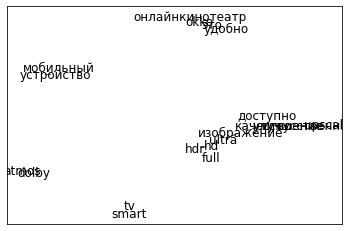

In [145]:
import networkx as nx
from networkx.algorithms import community

concept_graph = nx.Graph()

for bigram in sent_bigrams_list:
    
    for bigram_frq in bigram_frequency:
        
        if bigram == bigram_frq[0]:
        
            check = bigram_frq[1]
            
            if check > 1:
                
                concept_graph.add_edge(bigram[0],bigram[1],weight = check)
            
    
    
options = {
'node_color': 'white',
'node_size': 100,
'width': 0.7,
}

nx.spring_layout(concept_graph)
nx.draw_networkx(concept_graph, **options)

#concepts[0]

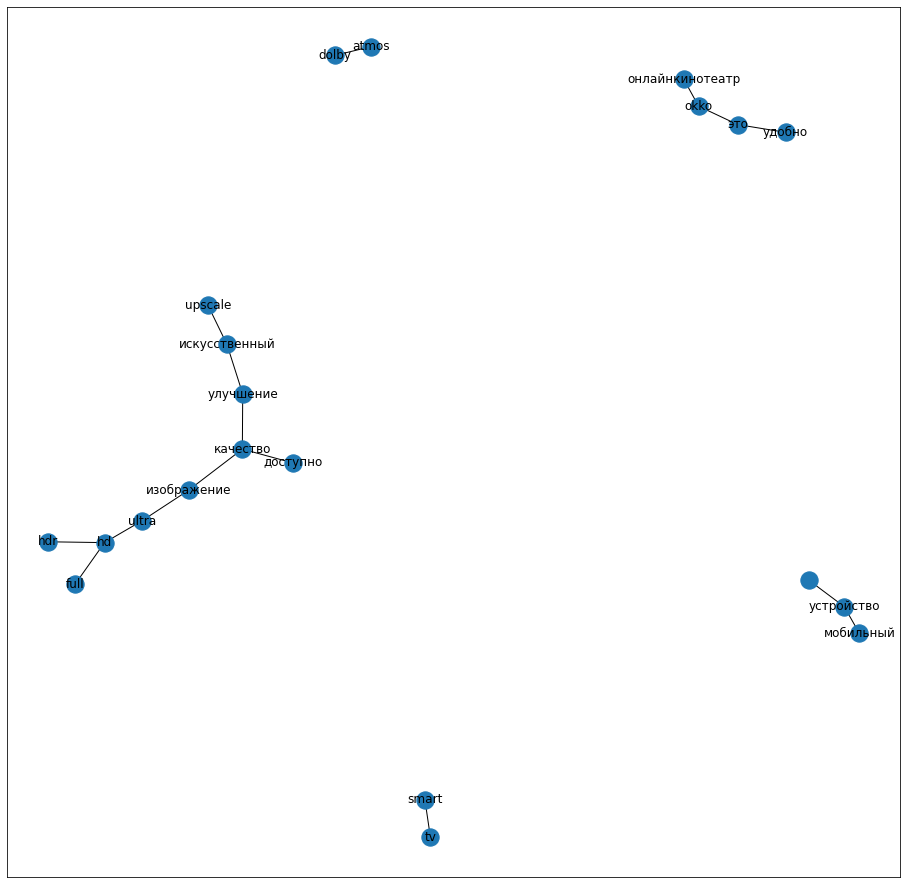

In [154]:
# nx.draw(concept_graph,with_labels=True,font_size=6)
# plt.savefig('before.png')
# l,r = plt.xlim()
# print(l,r)
# plt.xlim(l-2,r+2)
# plt.savefig('after.png')


plt.figure(figsize=(16,16))
nx.draw_networkx(concept_graph)
plt.savefig("path.png")

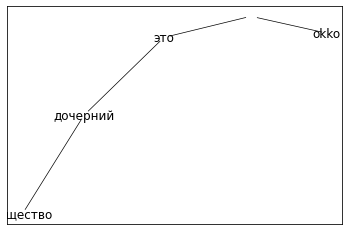

In [143]:
concept_graph = nx.Graph()

concept_graph.add_edge(sent_bigrams_list[1][0],sent_bigrams_list[1][1])
concept_graph.add_edge(sent_bigrams_list[2][0],sent_bigrams_list[2][1])
concept_graph.add_edge(sent_bigrams_list[3][0],sent_bigrams_list[3][1])
concept_graph.add_edge(sent_bigrams_list[4][0],sent_bigrams_list[4][1])


    
options = {
'node_color': 'white',
'node_size': 100,
'width': 0.7,
}
    
nx.draw_networkx(concept_graph, **options)


In [141]:
sent_bigrams_list



[('такой', 'okko'),
 ('okko', ''),
 ('', 'это'),
 ('это', 'дочерний'),
 ('дочерний', 'общество'),
 ('общество', 'пао'),
 ('пао', 'сбербанк'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'это'),
 ('это', 'возможность'),
 ('возможность', 'смотреть'),
 ('смотреть', 'фильм'),
 ('фильм', 'сериал'),
 ('сериал', 'создать'),
 ('создать', 'современный'),
 ('современный', 'устройство'),
 ('устройство', 'телевизор'),
 ('телевизор', 'мобильный'),
 ('мобильный', 'устройство'),
 ('устройство', 'тд'),
 ('возможность', 'использовать'),
 ('использовать', 'smart'),
 ('smart', 'устройство'),
 ('устройство', 'предел'),
 ('предел', 'он'),
 ('он', 'возможность'),
 ('возможность', 'получать'),
 ('получать', 'качественный'),
 ('качественный', 'картинка'),
 ('картинка', 'звук'),
 ('онлайнкинотеатр', 'okko'),
 ('okko', 'удобный'),
 ('удобный', 'быстрый'),
 ('быстрый', 'способ'),
 ('способ', 'смотреть'),
 ('смотреть', 'хотеться'),
 ('хотеться', 'проводы'),
 ('проводы', 'настройка'),
 ('настройка', 'поиск'),
 ('поиск

In [84]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(concept_graph)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['',
  'atmos',
  'okko',
  'play',
  'station',
  'upscale',
  'английский',
  'апл',
  'быстрый',
  'вектор',
  'выкупить',
  'год',
  'дочерний',
  'единственный',
  'запустить',
  'запуститься',
  'искусственный',
  'кино',
  'кинотеатр',
  'кинотеатральный',
  'коллекция',
  'кто',
  'лига',
  'мобха',
  'мы',
  'нет',
  'общество',
  'объединять',
  'окко',
  'онлайнкинотеатр',
  'оффлайна',
  'пао',
  'показ',
  'пополнение',
  'постоянный',
  'почему',
  'право',
  'предоставлять',
  'премьер',
  'развитие',
  'ребрендинга',
  'россия',
  'сбербанк',
  'способ',
  'такой',
  'тот',
  'удобно',
  'удобный',
  'улучшение',
  'футбол',
  'число',
  'экосистема',
  'эксклюзивный',
  'это'],
 ['android',
  'd',
  'digital',
  'dolby',
  'full',
  'hd',
  'hdr',
  'ios',
  'iosandroid',
  'k',
  'smart',
  'ultra',
  'аккаунт',
  'библиотека',
  'большинство',
  'возможность',
  'возможный',
  'воспроизведение',
  'впервые',
  'время',
  'дополнительный',
  'доступ',
  'доступно',
 

In [66]:
'okko' in sent_bigrams[3][0]

True

In [51]:
clean_sent

['онлайнкинотеатр', 'okko', 'удобно']

In [ ]:
# '''
# Дальше идет вычисление TF-IDF - еще не доделано! 
# '''

# import pprint

# # calculating TF-IDF

# corpus = [full_text, full_text2]

# # # Create a set of frequent words
# # stoplist = set('for a of the and to in'.split(' '))

# # Lowercase each document, split it by white space and filter out stopwords
# texts = [[word for word in document.lower().split()] #if word not in stoplist]
#          for document in corpus]

# # Count word frequencies
# from collections import defaultdict
# frequency = defaultdict(int)
# for text in texts:
#     for token in text:
#         frequency[token] += 1

# # Only keep words that appear more than once
# processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
# #pprint.pprint(processed_corpus)

# from gensim import corpora

# dictionary = corpora.Dictionary(processed_corpus)
# print(dictionary)

# pprint.pprint(dictionary.token2id)

# # bag-of-words 

# bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
# pprint.pprint(bow_corpus)

In [ ]:
# #
# from gensim import models

# # train the model
# tfidf = models.TfidfModel(bow_corpus)

# # transform the "system minors" string
# words = full_text.lower().split()
# print(tfidf[dictionary.doc2bow(words)])

In [ ]:
# from gensim import similarities

# index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

# query_document = full_text.split()
# query_bow = dictionary.doc2bow(query_document)
# sims = index[tfidf[query_bow]]
# print(list(enumerate(sims)))

To-do:
    Other objects (pictures)
    
    